# HEART ATTACK ANALYSIS AND PREDICTION💔

* [IMPORT FILES](#section-two)
* [GET THE DATA](#section-three)
* [EDA](#section-four)
* [DATA VISUALIZATION](#section-five)
* [DATA PREPROCESSING](#section-six)
* [MODELS](#section-seven)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

> Data Dictionary

age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholesterol in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable


<a id="section-two"></a>
# IMPORT FILES
Importing all my required libraries for this notebook.

In [2]:
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

<a id="section-three"></a>
# GET THE DATA
Fetching data from CSV file.

In [4]:
df = pd.read_csv("/content/heart.csv")

<a id="section-four"></a>
# Get to know the data
The main purpose of EDA is to help look at data before making any assumptions.

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [8]:
df["age"].mean()

54.366336633663366

In [9]:
#missing value
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<a id="section-five"></a>
# See the data (be the data)


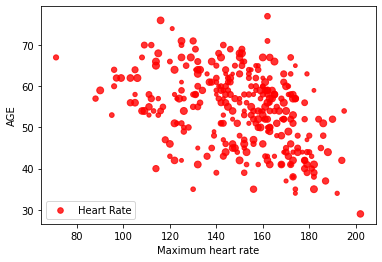

In [10]:
# Fixing random state for reproducibility
np.random.seed(19680801)


x = df['thalachh']
y = df['age']
s = np.random.rand(*x.shape) * 150 + 50

plt.scatter(x, y, s, c="r", alpha=0.8, marker=r'.',
            label="Heart Rate")
plt.xlabel("Maximum heart rate")
plt.ylabel("AGE")
plt.legend(loc='lower left')
plt.show()

<Figure size 1440x1080 with 0 Axes>

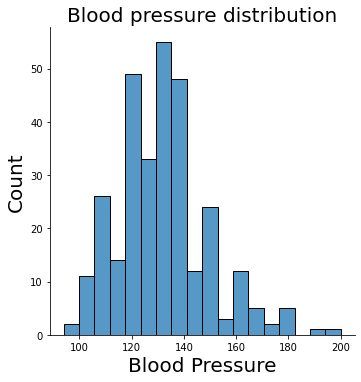

In [11]:
plt.figure(figsize=(20,15))
sns.displot(df["trtbps"])
plt.title("Blood pressure distribution", fontsize=20)
plt.xlabel("Blood Pressure", fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

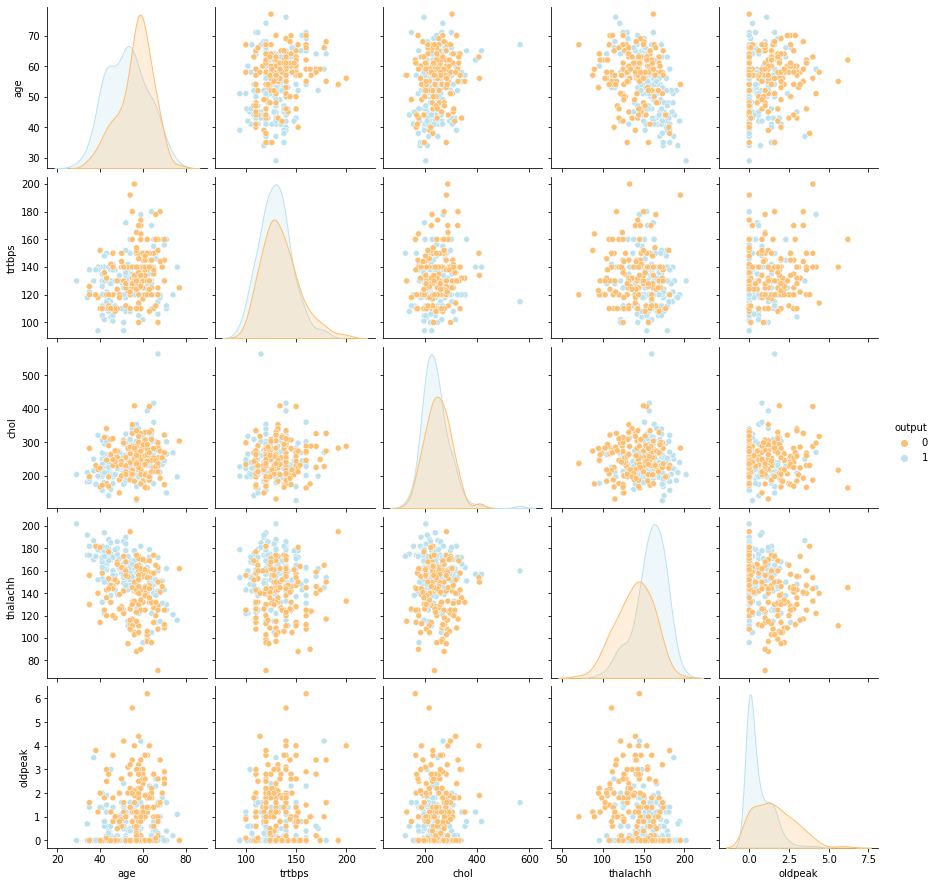

In [12]:
x_vars=['age','trtbps','chol','thalachh','oldpeak']
y_vars=['age','trtbps','chol','thalachh','oldpeak']

sns.pairplot(data=df,x_vars=x_vars,y_vars=y_vars,hue='output',palette='RdYlBu')

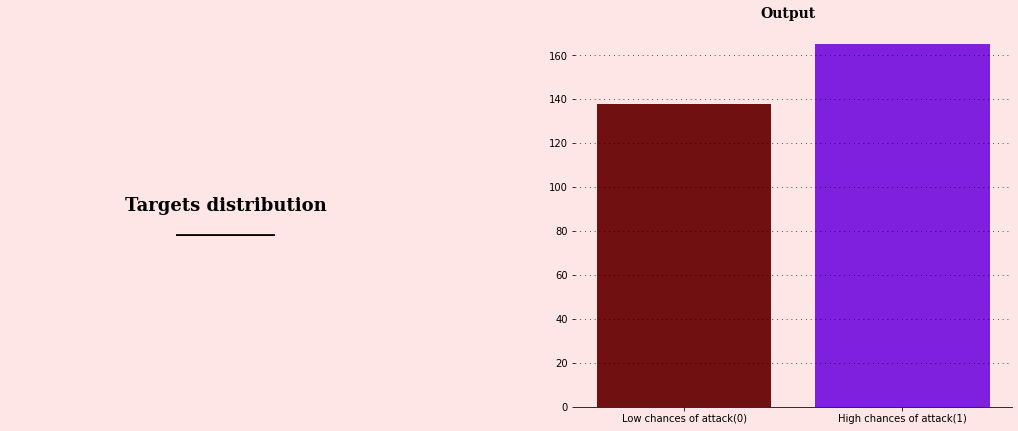

In [13]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Targets distribution\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)


4.1 Conclusions from the data analysis

    There are no NaN values in the data.
    There are certain outliers in all the continuous features.
    The scatterplot heatmap matrix suggests that there might be some correlation between output and cp, thalachh and slp.
    It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of age wrt output, it is evident that this isn't the case.
    According to the distribution plot of thalachh wrt output, people with higher maximum heart rate achieved have higher chances of heart attack.
    According to the distribution plot of oldpeak wrt output, people with lower pevious peak achieved have higher chances of heart attack.

<a id="section-six"></a>
# Convert to numpy


In [14]:
x=df.iloc[:, :-1].values 
y=df.iloc[:, -1].values
x.shape

(303, 13)

In [15]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)


**FEATURE SCALING**

In [16]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train = pd.DataFrame(x_train,columns = df.columns.drop('output'))
x_test = pd.DataFrame(x_test,columns = df.columns.drop('output'))
# y_train = pd.DataFrame(y_train,columns = ['output'])
# y_test = pd.DataFrame(y_test,columns = ['output'])

<a id="section-seven"></a>
# MODELS
Use SVMs, LightGBM and Random Forests.

**SUPPORT VECTOR MACHINE**

Confusion Matrix: [[21  6]
 [ 2 32]]
The Accuracy of SVM is:  86.88524590163934


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


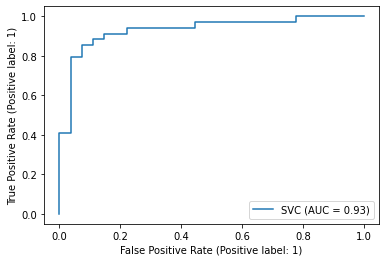

In [17]:
model_svc= SVC()
model_svc.fit(x_train, y_train)
predicted=model_svc.predict(x_test)
conf= confusion_matrix(y_test, predicted)
print("Confusion Matrix:", conf)
print("The Accuracy of SVM is: ", accuracy_score(y_test, predicted)*100)
correct_predictions_SVC = y_test==predicted
plot_roc_curve(model_svc,x_test,y_test)

**GRADIENT BOOSTED TREES**

Confusion Matrix: [[21  6]
 [ 3 31]]
The Accuracy of LGBM is:  85.24590163934425


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


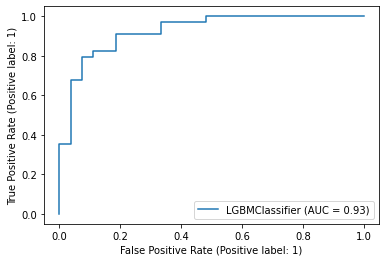

In [18]:
model_lgb = LGBMClassifier(num_leaves=5)
model_lgb.fit(x_train, y_train)
predicted=model_lgb.predict(x_test)
conf= confusion_matrix(y_test, predicted)
print("Confusion Matrix:", conf)
print("The Accuracy of LGBM is: ", accuracy_score(y_test, predicted)*100)
correct_predictions_GBT = y_test==predicted
plot_roc_curve(model_lgb,x_test,y_test)

**RANDOM FOREST**

Confusion Matrix: [[23  4]
 [ 5 29]]
The Accuracy of Random Forest is:  85.24590163934425


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


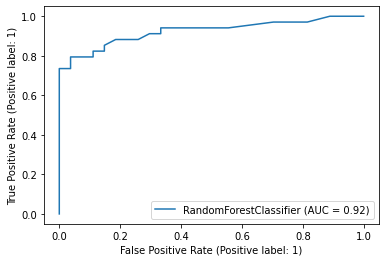

In [19]:
model_rf = RandomForestClassifier(n_estimators=50)
model_rf.fit(x_train, y_train)
predicted=model_rf.predict(x_test)
conf= confusion_matrix(y_test, predicted)
print("Confusion Matrix:", conf)
print("The Accuracy of Random Forest is: ", accuracy_score(y_test, predicted)*100)
correct_predictions_RF = y_test==predicted
plot_roc_curve(model_rf,x_test,y_test)

In [20]:
print("DO THE MODELS MAKE THE SAME MISTAKES?")
print(f"svc vs gbt intersection: {(correct_predictions_SVC==correct_predictions_GBT).mean()}")
print(f"svc vs rf intersection: {(correct_predictions_SVC==correct_predictions_RF).mean()}")
print(f"rf vs gbt intersection: {(correct_predictions_RF==correct_predictions_GBT).mean()}")

DO THE MODELS MAKE THE SAME MISTAKES?
svc vs gbt intersection: 0.9508196721311475
svc vs rf intersection: 0.9180327868852459
rf vs gbt intersection: 0.9344262295081968


it seems that the model's performance is really similar, they seem to be making the same mistakes. The mispredicted datapoints seem especially hard to predi. The test set is quite small, so it's difficult to differentiate.

The SVM ROC curve seems the best, though they are all quite similar.

# HW 2

In [21]:
!pip install dalex -U
!pip install shap
import dalex as dx
import shap
shap.initjs()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 42.5 MB/s 
  Created wheel for dalex: filename=dalex-1.5.0-py3-none-any.whl size=1043321 sha256=4021eb9b9bb25afe14bb5d7ab0c9068a1e04589f8ae717e9f4a2283f17065e1f
  Stored in directory: /root/.cache/pip/wheels/76/31/8c/c78df586df31b3f3e0c4ecc759ee73e175545cff5548201996
Successfully built dalex
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 24.5 MB/s 


# Exercises 4 and 5

Dalex package

Point 4, Point 5 (cp variable is negative in the first, positive in the second)

In [22]:
expl_RF = dx.Explainer(model_rf, x_test, y_test,
                         label='rf')
results = []
for name in x_test.index[0:4]:
    patient = x_test.loc[name,]
    sh = expl_RF.predict_parts(patient, type='shap', label=f"patient {name}")
    results.append(sh)

Preparation of a new explainer is initiated

  -> data              : 61 rows 13 cols
  -> target variable   : 61 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : rf
  -> predict function  : <function yhat_proba_default at 0x7fd8d794fcb0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.04, mean = 0.543, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.68, mean = 0.0141, max = 0.92
  -> model_info        : package sklearn

A new explainer has been created!


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [23]:
for r in results[:2]:
    r.plot()

Shap package

oldpeak and thall are most influential in the first patient, caa and cp in the second (ex.4)

cp is stronly negative in the first, stronly positive in the second (ex.5)

In [24]:
explainer = shap.Explainer(model_rf.predict, x_test)
shap_values = explainer(x_test[:2])

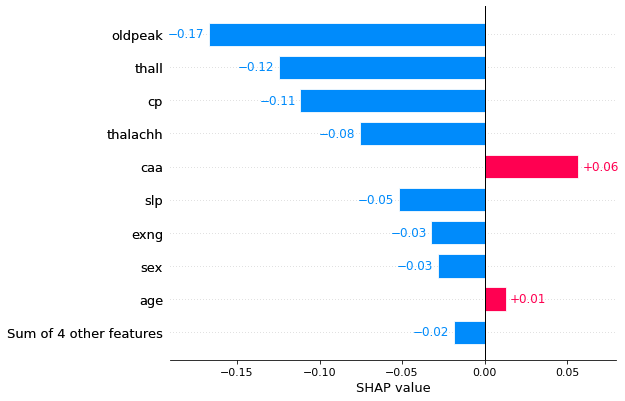

In [25]:
shap.plots.bar(shap_values[0])

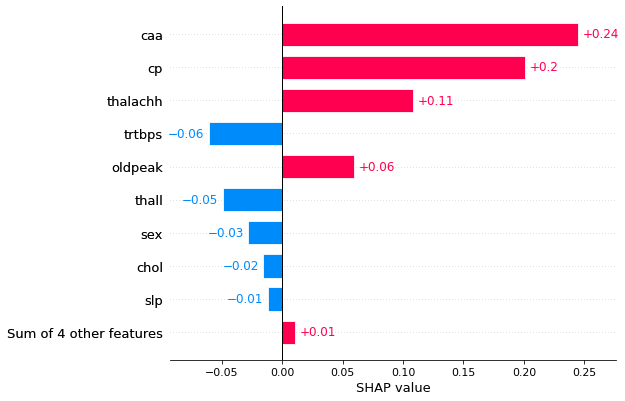

In [26]:
shap.plots.bar(shap_values[1])

# Exercise 6
The results for the first patient are very similar, but for the second one differ very significantly. The cp variable is given a far larger importance in the shap package - twice as large. For caa - the shap package attributes almost three times as large a contribution. It seems that the shap package attributed more influcence to the top variables, compared to dalex.

# Exercise 7

In [27]:
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)

expl_LR = dx.Explainer(model_linear, x_test, y_test,
                         label='lr')

results2 = []
for name in x_test.index[0:2]:
    patient = x_test.loc[name,]
    sh = expl_LR.predict_parts(patient, type='shap',label=f"patient {name}")
    results2.append(sh)

Preparation of a new explainer is initiated

  -> data              : 61 rows 13 cols
  -> target variable   : 61 values
  -> model_class       : sklearn.linear_model._base.LinearRegression (default)
  -> label             : lr
  -> predict function  : <function yhat_default at 0x7fd8d794fd40> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.282, mean = 0.541, max = 1.3
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.913, mean = 0.0161, max = 0.84
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



# LINEAR MODELS EXPLANATIONS

In [28]:
for r in results2:
    r.plot()

# PREVIOUS MODEL EXPLANATIONS

In [29]:
for r in results[:2]:
    r.plot()

While the attributions for the first patient are quite similar, the second one differs in the two models. Among the top 4 explanatory variables, only 2 of them intersect across the models. Once again, cp is twice as important for the linear model, than it is for the random forest model.

# Exercise 8
It is apparent that the different models create very different decision boundaries - the model explanations for the linear regression and random forests are vastly different. When the same explanation algo is run more than once, it's clear that the variance in outcomes can be significant - the results are rarely the same twice. It is interesting to see that, as above, same variables can have positive and negative attributions, depending on the patient. It is important to note, though, that the causal effects of the values of explanatory variables are not given by the analysis above - much more careful consideration needs to be taken for results of that kind.